In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

2022-04-10 11:50:34.705742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-10 11:50:34.705820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fire_training = "Dataset_Fire/Training"
training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=30, height_shift_range=0.2, fill_mode='nearest')

fire_validation = "Dataset_Fire/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

fire_train_generator = training_datagen.flow_from_directory(fire_training,target_size=(224,224),class_mode='categorical',batch_size = 64)

fire_validation_generator = validation_datagen.flow_from_directory(fire_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)


Found 999 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [3]:
model_fire = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_fire.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])
history = model_fire.fit(fire_train_generator,steps_per_epoch = 15,epochs = 50,validation_data = fire_validation_generator,validation_steps = 15)

2022-04-10 11:50:37.601296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-10 11:50:37.968249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-10 11:50:37.968296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2022-04-10 11:50:37.968397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-10 11:50:37.968458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynam

Epoch 1/50
15/15 [==============================] - 40s 3s/step - loss: 0.5100 - acc: 0.7552 - val_loss: 0.5368 - val_acc: 0.5238
Epoch 2/50
15/15 [==============================] - 32s 2s/step - loss: 0.2695 - acc: 0.8759
Epoch 3/50
15/15 [==============================] - 31s 2s/step - loss: 0.1697 - acc: 0.9316
Epoch 4/50
15/15 [==============================] - 31s 2s/step - loss: 0.1468 - acc: 0.9444
Epoch 5/50
15/15 [==============================] - 32s 2s/step - loss: 0.1436 - acc: 0.9510
Epoch 6/50
15/15 [==============================] - 32s 2s/step - loss: 0.1423 - acc: 0.9422
Epoch 7/50
15/15 [==============================] - 32s 2s/step - loss: 0.1076 - acc: 0.9583
Epoch 8/50
15/15 [==============================] - 32s 2s/step - loss: 0.1074 - acc: 0.9604
Epoch 9/50
15/15 [==============================] - 32s 2s/step - loss: 0.1434 - acc: 0.9369
Epoch 10/50
15/15 [==============================] - 32s 2s/step - loss: 0.1276 - acc: 0.9540
Epoch 11/50
15/15 [=============

In [6]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

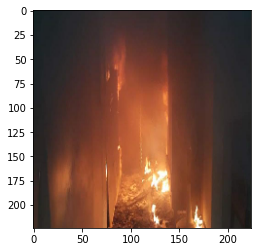

Detected Fire


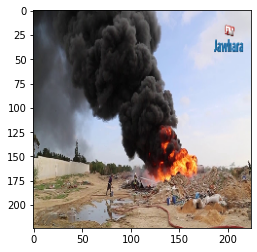

Detected Fire


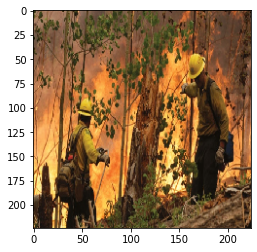

Detected Fire


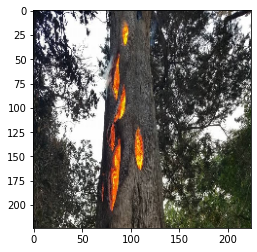

Detected Fire


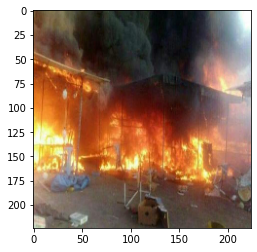

Detected Fire


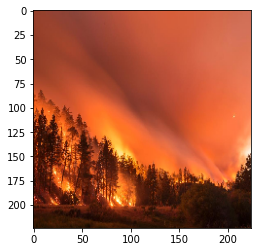

Detected Fire


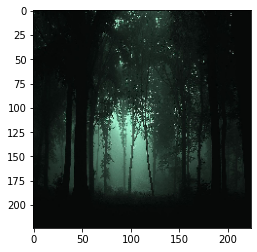

Didn't detect Fire


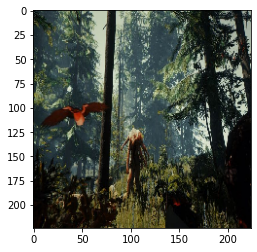

Didn't detect Fire


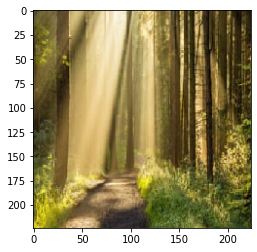

Didn't detect Fire


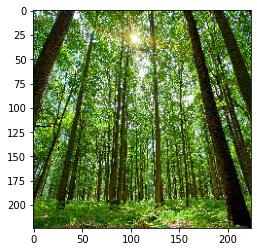

Didn't detect Fire


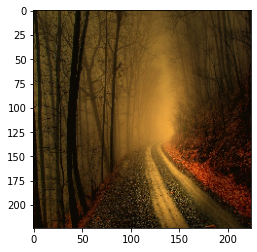

Detected Fire


In [7]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'Dataset_fire/Testing'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_fire.predict(x)
    fire_flag = detect("Fire",np.argmax(classes[0]) == 0 )
    print(fire_flag)